In [132]:
#importing the libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
#reading the .csv file 
data = pd.read_csv("pima-indians-diabetes.csv")

In [122]:
#preview of the data.
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [140]:
#renaming the columns
data.columns=['pregnancies','glucose','BloodPressure','SkinThickness',
              'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
data.head()

,pregnancies,glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


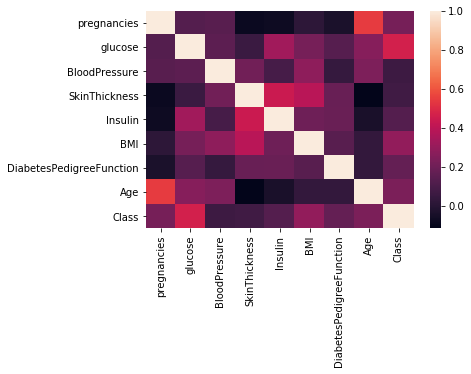

In [131]:
#plotting a heatmap which shows the relation between the variables.
sns.heatmap(data.corr())
plt.show()

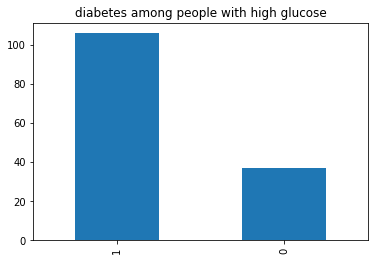

In [133]:
#dividing data into those having glucose level above 150 and those having levels lower than 150.
data_gh = data[data['glucose'] >= 150]
data_lh = data[data['glucose'] < 150]
#plotting a bar graph for the people with high glucose.
data_gh.Class.value_counts().plot(kind='bar')
plt.title('diabetes among people with high glucose')
plt.show()

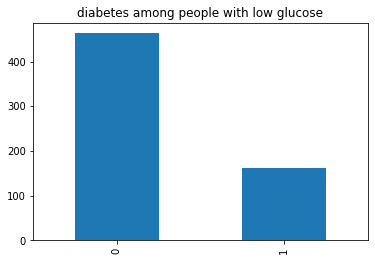

In [134]:
#plotting a bar graph for people less glucose.
data_lh.Class.value_counts().plot(kind='bar')
plt.title('diabetes among people with low glucose')
plt.show()

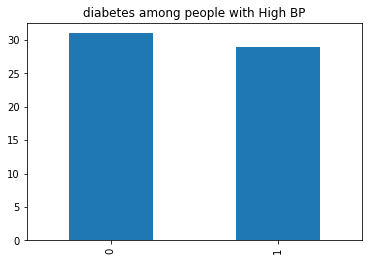

In [141]:
#comparing diabetes level among people who have daistolic BP above 90 and those who have daistolic BP lower than 90.
data_hb = data[data['BloodPressure'] >= 90]
data_lb = data[data['BloodPressure'] < 90]
data_hb.Class.value_counts().plot(kind='bar')
plt.title('diabetes among people with High BP') 
plt.show()

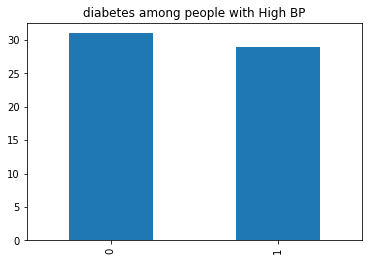

In [143]:
#comparing diabetes level among people who have daistolic BP above 90 and those who have daistolic BP lower than 90.
data_hb.Class.value_counts().plot(kind='bar')
plt.title('diabetes among people with High BP')
plt.show()

In [65]:
#importing the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
#dividing the data into features and prediction column.
X = scaler.fit_transform(data.drop(columns='Class'))
y = data.Class

In [68]:
#importing train test split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.33, random_state=42)

In [72]:
#importing the logisticRegression model from scikit learn.
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
#fitting the model
model = reg.fit(X_train, y_train)
#predicting the output
pred = model.predict(X_test)

In [79]:
#importing the accuracy score.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)*100

75.68093385214007

In [116]:
#Using min max scaler to check if our model improves.
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
x = scaler1.fit_transform(data.drop(columns='Class'))
Y = data.Class
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,train_size=0.33, random_state=42)
model1 = reg.fit(x_train, Y_train)
pred1 = model1.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred1)*100

73.92996108949417

In [138]:
#importing k-nearest-neighbors.
from sklearn.neighbors import KNeighborsClassifier
neighbour_classifier = KNeighborsClassifier(n_neighbors=2)
#training our model
mod = neighbour_classifier.fit(X_train, y_train)
#predicting an output.
predictions = mod.predict(X_test)

In [139]:
#calculating the score of our knn classifier.
y_test = np.array(y_test).reshape(-1,1)
cross_val_score(mod, X_test, y_test.ravel(),cv=5)
accuracy_score(predictions, y_test)*100

68.8715953307393